In [26]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, LinearRegression
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from pycaret.regression import setup, compare_models
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [46]:
df = pd.read_csv('../data/regression_test_eda.csv')

In [6]:
df.head()

,Unnamed: 0,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,...,log_transformed_mother_delivery_weight,no_mother_weight_gain,cigarettes_before_pregnancy_0,cigarettes_before_pregnancy_0_5,cigarettes_before_pregnancy_5_10,cigarettes_before_pregnancy_10_20,cigarettes_before_pregnancy_20_30,cigarettes_before_pregnancy_30_40,cigarettes_before_pregnancy_60,no_prenatal_care_month
0,0,30.8,3208.861531,220.0,3310.541143,65.0,35.0,29.0,3335.090204,0.0,...,5.393628,0,1,0,0,0,0,0,0,0
1,1,45.8,3208.861531,293.0,3310.541143,64.0,26.0,37.0,3288.660321,0.0,...,5.680173,0,1,0,0,0,0,0,0,0
2,2,NaN,3315.684125,NaN,3310.541143,66.0,NaN,33.0,3335.090204,0.0,...,NaN,0,1,0,0,0,0,0,0,0
3,3,24.3,3315.684125,157.0,3310.541143,NaN,20.0,27.0,3335.090204,0.0,...,5.056246,0,1,0,0,0,0,0,0,0
4,4,24.1,3315.684125,187.0,3310.541143,65.0,42.0,29.0,3310.757623,0.0,...,5.231109,0,1,0,0,0,0,0,0,0


In [11]:
# df.previous_cesarean = df.previous_cesarean.map({'N': 0, 'Y': 1})
# df.newborn_gender = df.newborn_gender.map({'F': 0, 'M': 1})

In [47]:
X, X_test, y, y_test = train_test_split(df.drop(columns='newborn_weight'), df.newborn_weight, test_size=0.1)

In [8]:
clf = setup(df, target='newborn_weight', use_gpu=True, n_jobs=-1, fold=5)

,Description,Value
0,Session id,8059
1,Target,newborn_weight
2,Target type,Regression
3,Original data shape,"(2397760, 26)"
4,Transformed data shape,"(2397760, 26)"
5,Transformed train set shape,"(1678432, 26)"
6,Transformed test set shape,"(719328, 26)"
7,Numeric features,25
8,Rows with missing values,33.0%
9,Preprocess,True


In [9]:
best = compare_models(include=['lr', 'lasso', 'ridge', 'en', 'knn', 'dt', 'rf', 'ada', 'xgboost', 'dummy'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,403.5526,293974.1198,542.1928,0.1585,0.2129,0.1557,1.4420
rf,Random Forest Regressor,412.2512,303410.6013,550.8263,0.1315,0.2143,0.1574,73.0920
lr,Linear Regression,408.1308,307673.1273,554.6818,0.1193,0.2196,0.1606,3.2840
ridge,Ridge Regression,408.1271,307673.1463,554.6818,0.1193,0.2196,0.1606,1.0260
lasso,Lasso Regression,409.5921,310746.0199,557.4449,0.1105,0.2208,0.1617,2.5700
en,Elastic Net,410.7432,312229.8857,558.7743,0.1062,0.2212,0.1621,1.4920
ada,AdaBoost Regressor,433.2320,327310.4949,572.1066,0.0630,0.2191,0.1618,60.7080
dummy,Dummy Regressor,436.1931,349336.0001,591.0450,-0.0000,0.2313,0.1725,0.6240
knn,K Neighbors Regressor,467.6947,390020.4266,624.5152,-0.1165,0.2393,0.1818,58.2680
dt,Decision Tree Regressor,599.2101,627645.8544,792.2396,-0.7967,0.3102,0.2162,18.1420


In [10]:
lasso = compare_models(include=['lasso'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,409.5921,310746.0199,557.4449,0.1105,0.2208,0.1617,2.4360


In [11]:
rf = compare_models(include=['rf'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,412.2512,303410.6013,550.8263,0.1315,0.2143,0.1574,73.0220


In [12]:
scaler = MinMaxScaler()
df_xgb = pd.DataFrame({
    'feature': best.feature_names_in_,
    'importance': scaler.fit_transform(best.feature_importances_.reshape(-1, 1)).ravel(),
    'model_type': 'XGB'
})
scaler = MinMaxScaler()
df_lasso = pd.DataFrame({
    'feature': best.feature_names_in_,
    'importance': scaler.fit_transform(lasso.coef_.reshape(-1, 1)).ravel(),
    'model_type': 'Lasso'
})
scaler = MinMaxScaler()
df_rf = pd.DataFrame({
    'feature': rf.feature_names_in_,
    'importance': scaler.fit_transform(rf.feature_importances_.reshape(-1, 1)).ravel(),
    'model_type': 'Random Forest'
})

Text(0, 0.5, 'Feature')

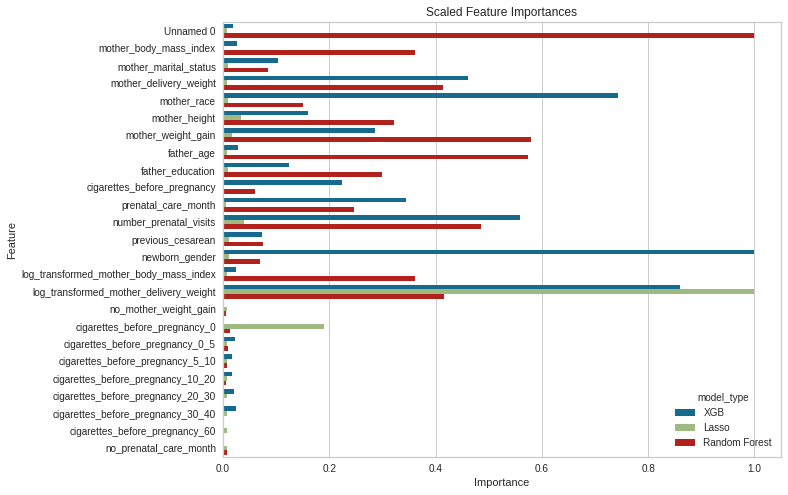

In [13]:
df = pd.concat([df_xgb, df_lasso, df_rf])

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', hue='model_type', data=df, orient='h')
plt.title('Scaled Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

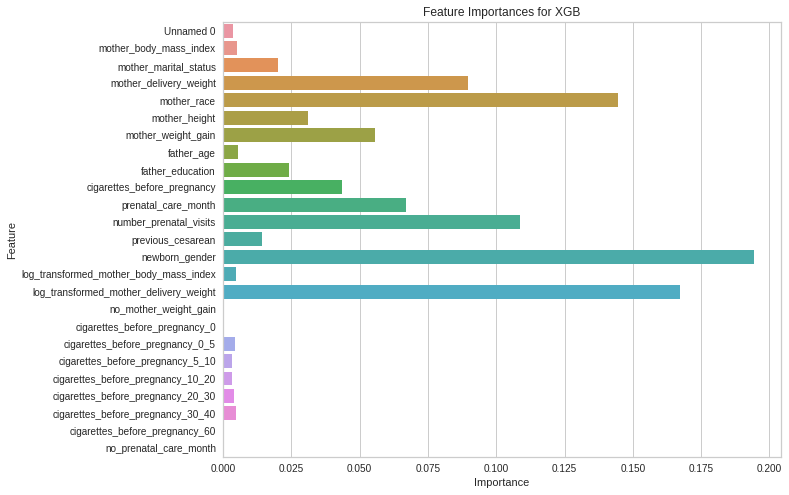

In [14]:
df_xgb_raw = pd.DataFrame({
    'feature': best.feature_names_in_,
    'importance': best.feature_importances_,
    'model_type': 'XGB'
})
# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=df_xgb_raw, orient='h')
plt.title('Feature Importances for XGB')
plt.xlabel('Importance')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

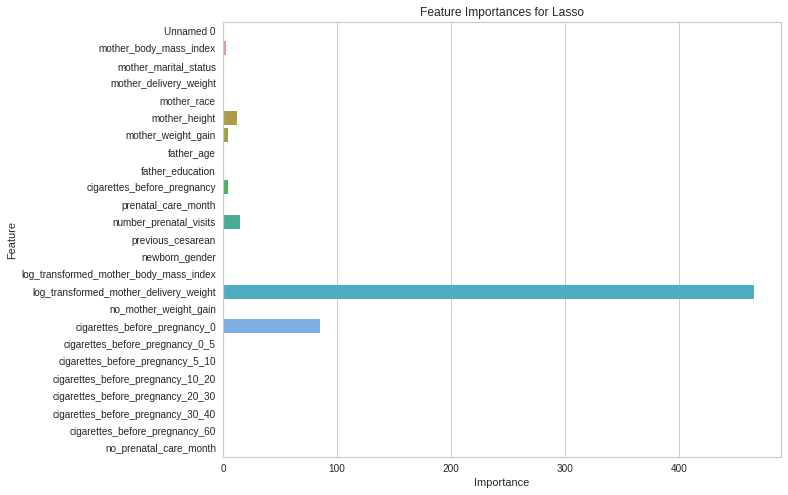

In [17]:
df_lasso_raw = pd.DataFrame({
    'feature': best.feature_names_in_,
    'importance': np.abs(lasso.coef_),
    'model_type': 'Lasso'
})
# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=df_lasso_raw, orient='h')
plt.title('Feature Importances for Lasso')
plt.xlabel('Importance')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

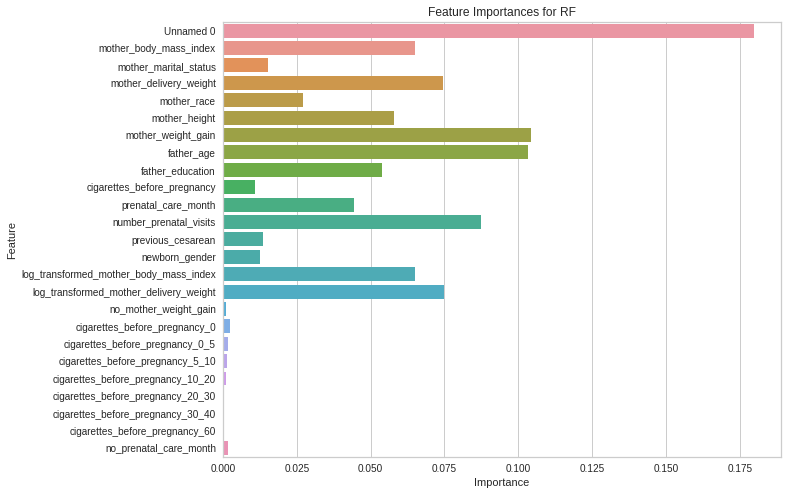

In [16]:
df_rf_raw = pd.DataFrame({
    'feature': rf.feature_names_in_,
    'importance': rf.feature_importances_,
    'model_type': 'Random Forest'
})
# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=df_rf_raw, orient='h')
plt.title('Feature Importances for RF')
plt.xlabel('Importance')
plt.ylabel('Feature')

When it comes to least important features shared by the models, we have decided to drop:
- mother marital status
- cigarettes between pregnancy
- previous cesarean

In [ ]:
X = X.drop(columns=['mother_marital_status', 'cigarettes_before_pregnancy', 'previous_cesarean'])

In [18]:
model_lst = [Lasso, LinearRegression, xgb.XGBRegressor]
mape_dct_train = dict()
mape_dct_test = dict()
for model_base in model_lst:
    mape_dct_train[str(model_base)] = []
    mape_dct_test[str(model_base)] = []

Checking predictions on imputed datasets, with repeated k fold cv

In [29]:
rkf = RepeatedKFold(random_state=420602)
i = 0
for i, (train_index, test_index) in enumerate(rkf.split(X)):
    if i % 10 == 0:
        print(f'split {i}')
    i += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # imputation goes here
    scaler = RobustScaler()
    imputer = SimpleImputer()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    imputer.fit(X_train_scaled)
    X_train_imputed = imputer.transform(X_train_scaled)
    X_test_scaled = scaler.transform(X_test)
    X_test_imputed = imputer.transform(X_test_scaled)
    # models
    for model_base in model_lst:
        if 'xgb' in str(model_base):
            params_gpu = {"tree_method": "gpu_hist", "gpu_id": 0, "eval_metric": "mape"}
            model = model_base(**params_gpu)
        else:
            model = model_base()
        model.fit(X_train_imputed, y_train)
        pred_train = model.predict(X_train_imputed)
        pred_test = model.predict(X_test_imputed)
        mape_dct_test[str(model_base)].append(mean_absolute_percentage_error(y_test, pred_test))
        mape_dct_train[str(model_base)].append(mean_absolute_percentage_error(y_train, pred_train))
        # print(f'finished model {str(model)} for this split')

split 0
split 10
split 20
split 30
split 40


scores

In [32]:
for model_base in model_lst:
    print(f'{model_base} avg score on train: {np.mean(mape_dct_train[str(model_base)])} and on test: {np.mean(mape_dct_test[str(model_base)])}')

<class 'sklearn.linear_model._coordinate_descent.Lasso'> avg score on train: 0.1610735906587831 and on test: 0.16107804034351877
<class 'sklearn.linear_model._base.LinearRegression'> avg score on train: 0.16030693206677907 and on test: 0.16031380096513
<class 'xgboost.sklearn.XGBRegressor'> avg score on train: 0.15414836725125453 and on test: 0.15529105176365304


So we focus on xgboost due to highest performance.
Additional random search for xgb:

In [108]:
possible_params = {
    "n_estimators": [10, 25, 50, 100, 250],
    "eta": [0.1, 0.15, 0.2],
    "max_depth": [3, 5, 7],
    "colsample_bytree": [0.8, 0.9],
    "gamma": [0, 1, 3, 5],
    "eval_metric": ["mape"],
    "objective": ["reg:absoluteerror", "reg:squarederror"],
    "booster": ["gbtree"],
    "tree_method": ["gpu_hist"],
    "gpu_id": [0]
}

In [109]:
xgbr = xgb.XGBRegressor(enable_categorical=True)
clf = RandomizedSearchCV(xgbr, possible_params, n_iter=50, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_percentage_error')

In [110]:
df = pd.read_csv('../data/newborn_train.csv')
df['log_transformed_mother_body_mass_index'] = np.log(df['mother_body_mass_index'])
df['log_transformed_mother_delivery_weight'] = np.log(df['mother_delivery_weight'])
df['no_mother_weight_gain'] = np.where(df['mother_weight_gain'] == 0, 1, 0)
df['cigarettes_before_pregnancy_0'] = np.where(df['cigarettes_before_pregnancy'] == 0, 1, 0)
df['cigarettes_before_pregnancy_0_5'] = np.where((df['cigarettes_before_pregnancy'] > 0) & (df['cigarettes_before_pregnancy'] <= 5), 1, 0)
df['cigarettes_before_pregnancy_5_10'] = np.where((df['cigarettes_before_pregnancy'] > 5) & (df['cigarettes_before_pregnancy'] <= 10), 1, 0)
df['cigarettes_before_pregnancy_10_20'] = np.where((df['cigarettes_before_pregnancy'] > 10) & (df['cigarettes_before_pregnancy'] <= 20), 1, 0)
df['cigarettes_before_pregnancy_20_30'] = np.where((df['cigarettes_before_pregnancy'] > 20) & (df['cigarettes_before_pregnancy'] <= 30), 1, 0)
df['cigarettes_before_pregnancy_30_40'] = np.where((df['cigarettes_before_pregnancy'] > 30) & (df['cigarettes_before_pregnancy'] <= 40), 1, 0)
df['cigarettes_before_pregnancy_60'] = np.where((df['cigarettes_before_pregnancy'] > 60), 1, 0)
df['no_prenatal_care_month'] = np.where(df['prenatal_care_month'] == 99, 1, 0)
df["mother_marital_status"] = df["mother_marital_status"].map({1: "yes", 0: "no"})
df['mother_race'] = df['mother_race'].map({1: 'white', 2: 'black', 3: 'aian', 4: 'asian', 5: 'nhopi', 6: 'multiple'})
df['father_education'] = df['father_education'].map({1: '8th_grade', 2: '12th_grade', 3: 'high_school', 4: 'no_degree', 5: 'associate', 6: 'bachelor', 7: 'master', 8: 'doctor', 9: 'unknown'})

In [111]:
df.dtypes

mother_body_mass_index                    float64
mother_marital_status                      object
mother_delivery_weight                    float64
mother_race                                object
mother_height                             float64
mother_weight_gain                        float64
father_age                                float64
father_education                           object
cigarettes_before_pregnancy               float64
prenatal_care_month                         int64
number_prenatal_visits                    float64
previous_cesarean                          object
newborn_gender                             object
newborn_weight                              int64
log_transformed_mother_body_mass_index    float64
log_transformed_mother_delivery_weight    float64
no_mother_weight_gain                       int64
cigarettes_before_pregnancy_0               int64
cigarettes_before_pregnancy_0_5             int64
cigarettes_before_pregnancy_5_10            int64


In [112]:
df["mother_marital_status"] = df["mother_marital_status"].astype("category")
df["mother_race"] = df["mother_race"].astype("category")
df["father_education"] = df["father_education"].astype("category")
df["previous_cesarean"] = df["previous_cesarean"].astype("category")
df["newborn_gender"] = df["newborn_gender"].astype("category")

In [113]:
X, X_test, y, y_test = train_test_split(df.drop(columns='newborn_weight'), df.newborn_weight, test_size=0.1)

In [114]:
search = clf.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [115]:
search.best_params_

{'tree_method': 'gpu_hist',
 'objective': 'reg:squarederror',
 'n_estimators': 250,
 'max_depth': 7,
 'gpu_id': 0,
 'gamma': 3,
 'eval_metric': 'mape',
 'eta': 0.1,
 'colsample_bytree': 0.8,
 'booster': 'gbtree'}

In [116]:
cv_res = pd.DataFrame(search.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [117]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree_method,param_objective,param_n_estimators,param_max_depth,param_gpu_id,param_gamma,...,param_booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,84.033024,0.204794,5.938530,0.074515,gpu_hist,reg:squarederror,250,7,0,3,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.156395,-0.154687,-0.154723,-0.155269,-0.154506,-0.155116,0.000688,1
38,42.810038,0.126608,2.611141,0.026973,gpu_hist,reg:squarederror,100,7,0,5,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.156494,-0.154793,-0.154823,-0.155401,-0.154647,-0.155232,0.000682,2
42,12.864306,0.627393,0.851357,0.007758,gpu_hist,reg:squarederror,25,7,0,1,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.156521,-0.154775,-0.154841,-0.155453,-0.154648,-0.155248,0.000695,3
22,42.348522,0.102117,2.922997,0.027212,gpu_hist,reg:squarederror,100,7,0,1,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.156512,-0.154793,-0.154856,-0.155442,-0.154638,-0.155248,0.000688,4
0,71.886334,1.923019,4.045225,0.036226,gpu_hist,reg:squarederror,250,5,0,3,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.156569,-0.154856,-0.154891,-0.155462,-0.154683,-0.155292,0.000690,5
34,77.310336,0.301187,3.863665,0.027493,gpu_hist,reg:squarederror,250,5,0,3,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.156531,-0.154824,-0.154912,-0.155549,-0.154701,-0.155303,0.000680,6
18,72.544163,0.178077,4.145776,0.066361,gpu_hist,reg:squarederror,250,5,0,5,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.156621,-0.154904,-0.154985,-0.155561,-0.154722,-0.155359,0.000691,7
26,11.416486,0.318484,0.851295,0.025845,gpu_hist,reg:squarederror,25,7,0,5,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.156751,-0.154931,-0.155025,-0.155616,-0.154798,-0.155424,0.000720,8
27,29.602588,0.114184,1.978705,0.011302,gpu_hist,reg:squarederror,100,5,0,5,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.156969,-0.155200,-0.155316,-0.155884,-0.155027,-0.155679,0.000706,9
47,47.150816,0.705699,2.173730,0.033831,gpu_hist,reg:squarederror,250,3,0,3,...,gbtree,"{'tree_method': 'gpu_hist', 'objective': 'reg:...",-0.157301,-0.155500,-0.155639,-0.156203,-0.155384,-0.156006,0.000706,10


Additionally checking best models scores on oos test

In [118]:
params1 = cv_res.iloc[0, -9]
params2 = cv_res.iloc[1, -9]
params3 = cv_res.iloc[2, -9]
xgb_1 = xgb.XGBRegressor(enable_categorical=True, **params1)
xgb_2 = xgb.XGBRegressor(enable_categorical=True, **params2)
xgb_3 = xgb.XGBRegressor(enable_categorical=True, **params3)
xgb_1.fit(X, y)
xgb_2.fit(X, y)
xgb_3.fit(X, y)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=True, eta=0.15, eval_metric='mape',
             feature_types=None, gamma=1, gpu_id=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [119]:
print(f'params 1 score on oos test: {mean_absolute_percentage_error(xgb_1.predict(X_test), y_test)}')
print(f'params 2 score on oos test: {mean_absolute_percentage_error(xgb_2.predict(X_test), y_test)}')
print(f'params 3 score on oos test: {mean_absolute_percentage_error(xgb_3.predict(X_test), y_test)}')

params 1 score on oos test: 0.12496388045402171
params 2 score on oos test: 0.12507395933861282
params 3 score on oos test: 0.12884592449193105


In [120]:
params1

{'tree_method': 'gpu_hist',
 'objective': 'reg:squarederror',
 'n_estimators': 250,
 'max_depth': 7,
 'gpu_id': 0,
 'gamma': 3,
 'eval_metric': 'mape',
 'eta': 0.1,
 'colsample_bytree': 0.8,
 'booster': 'gbtree'}

In [121]:
params2

{'tree_method': 'gpu_hist',
 'objective': 'reg:squarederror',
 'n_estimators': 100,
 'max_depth': 7,
 'gpu_id': 0,
 'gamma': 5,
 'eval_metric': 'mape',
 'eta': 0.2,
 'colsample_bytree': 0.9,
 'booster': 'gbtree'}

In [122]:
params3

{'tree_method': 'gpu_hist',
 'objective': 'reg:squarederror',
 'n_estimators': 25,
 'max_depth': 7,
 'gpu_id': 0,
 'gamma': 1,
 'eval_metric': 'mape',
 'eta': 0.15,
 'colsample_bytree': 0.8,
 'booster': 'gbtree'}